In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Random Variables

In [5]:
from scipy.stats import norm

## Getting help

In [6]:
print(norm.__doc__)

A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, loc=0, scale=1)
        Log of the survival function.
    ppf(q, loc=0, scale

In [8]:
print('boundsofdistributionlower:%s,upper:%s'%(norm.a,norm.b))

boundsofdistributionlower:-inf,upper:inf


In [9]:
rv = norm()
dir(rv)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'support',
 'var']

## Distributions

In [10]:
import warnings

warnings.simplefilter('ignore',DeprecationWarning) 

dist_continu=[d for d in dir(stats) if 
              isinstance(getattr(stats,d),stats.rv_continuous)] 

dist_discrete=[d for d in dir(stats) if 
               isinstance(getattr(stats,d),stats.rv_discrete)] 

print('number of continuous distributions: ', len(dist_continu))
print('number of discrete distributions: ', len(dist_discrete))

number of continuous distributions:  107
number of discrete distributions:  19


In [11]:
print(dist_continu)

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 're

In [12]:
print(dist_discrete)

['bernoulli', 'betabinom', 'binom', 'boltzmann', 'dlaplace', 'geom', 'hypergeom', 'logser', 'nbinom', 'nchypergeom_fisher', 'nchypergeom_wallenius', 'nhypergeom', 'planck', 'poisson', 'randint', 'skellam', 'yulesimon', 'zipf', 'zipfian']


# Ejemplo - Distribución normal

In [21]:
# Calculate the first four moments:
mean, var, skew, kurt = norm.stats(moments='mvsk')

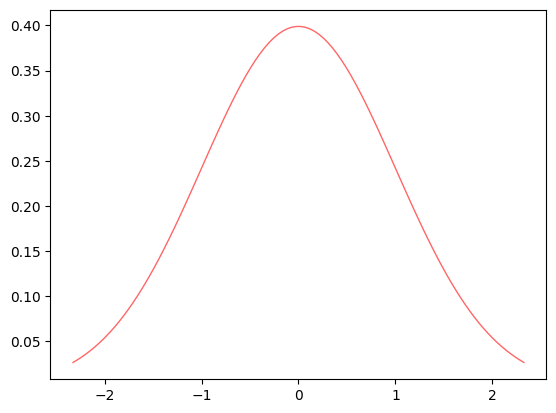

In [22]:
fig, ax = plt.subplots(1, 1)

# Display the probability density function (``pdf``):
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),'r-', lw=1, alpha=0.6, label='norm pdf');

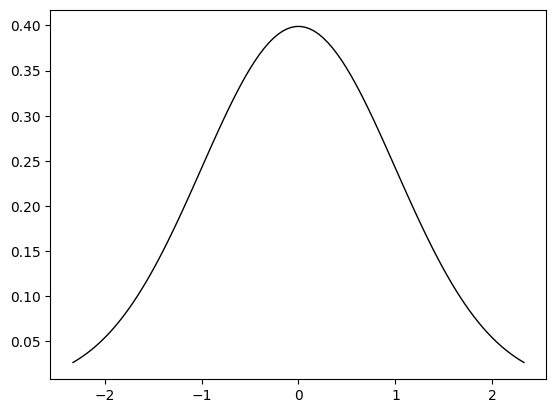

In [25]:
# Alternatively, the distribution object can be called (as a function)
# to fix the shape, location and scale parameters. This returns a "frozen"
# RV object holding the given parameters fixed.

fig, ax = plt.subplots(1, 1)

# Freeze the distribution and display the frozen ``pdf``:
    
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf');

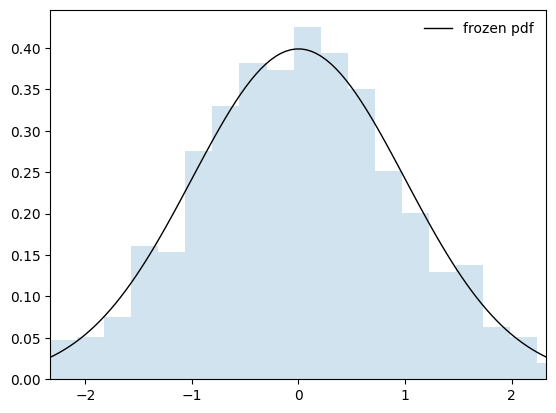

In [31]:
# Generate random numbers:
r = norm.rvs(size=1000)

# And compare the histogram:
fig, ax = plt.subplots(1, 1)

ax.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf');
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

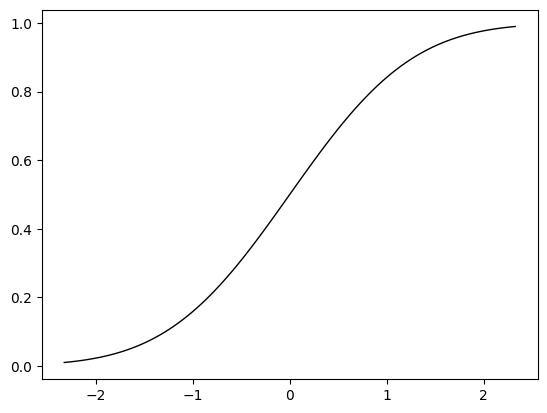

In [26]:
fig, ax = plt.subplots(1, 1)

# Freeze the distribution and display the frozen ``cdf``:
    
rv = norm()
ax.plot(x, rv.cdf(x), 'k-', lw=1, label='frozen cdf');

In [27]:

# Check accuracy of ``cdf`` and ``ppf``:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

## Common methods

In [32]:
norm.mean()

0.0

In [33]:
norm.median()

0.0

In [34]:
norm.var()

1.0

In [35]:
norm.std()

1.0

In [36]:
# PDF
norm.pdf(np.arange(-1, 1, .1))

array([0.24197072, 0.26608525, 0.28969155, 0.31225393, 0.3332246 ,
       0.35206533, 0.36827014, 0.38138782, 0.39104269, 0.39695255,
       0.39894228, 0.39695255, 0.39104269, 0.38138782, 0.36827014,
       0.35206533, 0.3332246 , 0.31225393, 0.28969155, 0.26608525])

In [37]:
# CDF
norm.cdf(np.arange(-1, 1, .1))

array([0.15865525, 0.18406013, 0.2118554 , 0.24196365, 0.27425312,
       0.30853754, 0.34457826, 0.38208858, 0.42074029, 0.46017216,
       0.5       , 0.53982784, 0.57925971, 0.61791142, 0.65542174,
       0.69146246, 0.72574688, 0.75803635, 0.7881446 , 0.81593987])

In [39]:
# QUANTILES
norm.ppf(np.arange(0, 1.1, .1))

array([       -inf, -1.28155157, -0.84162123, -0.52440051, -0.2533471 ,
        0.        ,  0.2533471 ,  0.52440051,  0.84162123,  1.28155157,
               inf])

In [40]:
# RANDOM SAMPLE
norm.rvs(size = 100)

array([-0.99169146,  0.84004659,  0.73833194, -0.20857841, -1.0978531 ,
       -2.15571733, -0.98834071,  0.16686031, -1.05722259,  0.14091191,
       -2.32986982,  0.77931734, -0.41882086,  1.40782644, -1.21220881,
       -0.60786896, -0.08552646, -0.58694827, -1.05184647,  1.50093293,
       -1.21991096,  2.10947264, -0.85603293, -1.93458761,  1.39776018,
        0.78964301,  0.91982574, -0.07131888, -0.12471132, -0.79716222,
       -0.42080126,  2.23388284, -0.8239346 ,  1.40093483, -0.05875073,
        0.03229881, -1.03704148,  0.35905542, -0.44439815,  0.03460169,
        0.23126979,  0.23153919, -0.78244912,  0.12110383, -2.47090739,
       -1.28051845,  0.34252325, -1.26165051, -1.28630839, -0.5431113 ,
       -0.04391955, -2.26860244,  0.85979994,  0.76382079,  0.10336527,
        0.26287543, -1.01593856,  0.67423244, -1.04332353,  0.84292939,
       -0.67603168, -0.51942757, -0.07560622, -0.06271603,  0.03517374,
       -0.79754716,  0.28750756, -0.97013063, -1.69825277, -1.90

# Shifting and scaling

In [42]:
norm.stats(loc = 3, scale = 4, moments = "mv")

(3.0, 16.0)

## Freezing a distribution

In [43]:
rv2 = norm(loc = 3, scale = 4)
rv2.stats(moments = "mv")

(3.0, 16.0)

## Fit

In [45]:
norm.fit(rv2.rvs(100000))

(2.9849852986631125, 4.004775150840912)

# Ejemplo - Distribución binomial

In [47]:
from scipy.stats import binom

drv_binom = binom(n = 100, p = 0.5)

In [48]:
drv_binom.stats()

(50.0, 25.0)

In [53]:
drv_binom.rvs(size = 10)

array([51, 51, 53, 56, 56, 49, 46, 52, 53, 59], dtype=int64)

In [55]:
drv_binom.rvs(size = 10)

array([42, 48, 44, 50, 47, 47, 44, 44, 46, 51], dtype=int64)

In [56]:
drv_binom.rvs(size = 10, random_state=123)

array([52, 50, 43, 50, 58, 51, 52, 53, 55, 50], dtype=int64)

In [60]:
drv_binom.rvs(size = 10, random_state=123)

array([52, 50, 43, 50, 58, 51, 52, 53, 55, 50], dtype=int64)

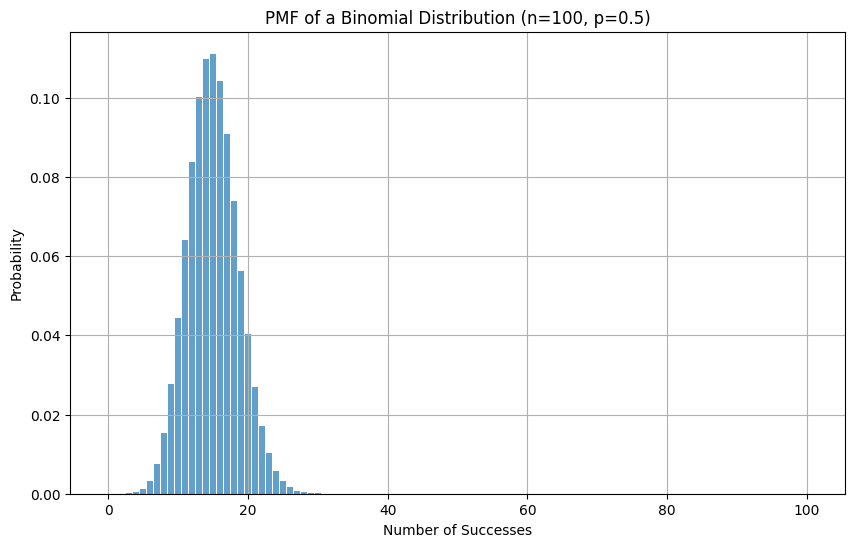

In [78]:
n = 100
p = 0.15

x = np.arange(0, n+1)

plt.figure(figsize=(10, 6))
plt.bar(x, binom.pmf(x, n = n, p = p), alpha=0.7)
plt.title('PMF of a Binomial Distribution (n=100, p=0.5)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Analysing one sample

# Comparing two samples

# Kernel Density Estimation

# Univariate

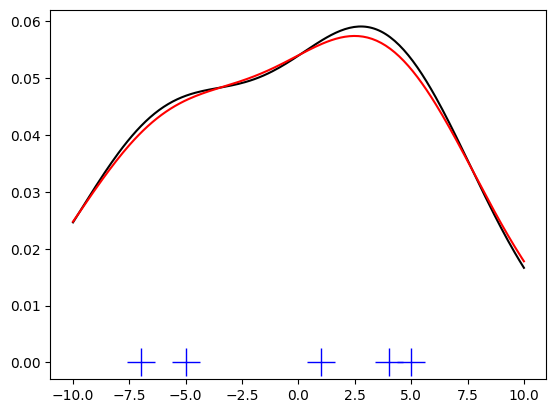

In [82]:
x1=np.array([-7,-5,1,4,5],dtype=float)

kde1=stats.gaussian_kde(x1)
kde2=stats.gaussian_kde(x1,bw_method='silverman')

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(x1,np.zeros(x1.shape),'b+',ms=20) #rugplot
x_eval=np.linspace(-10,10,num=200)
ax.plot(x_eval,kde1(x_eval),'k-',label="Scott'sRule") 
ax.plot(x_eval,kde2(x_eval),'r-',label="Silverman'sRule")


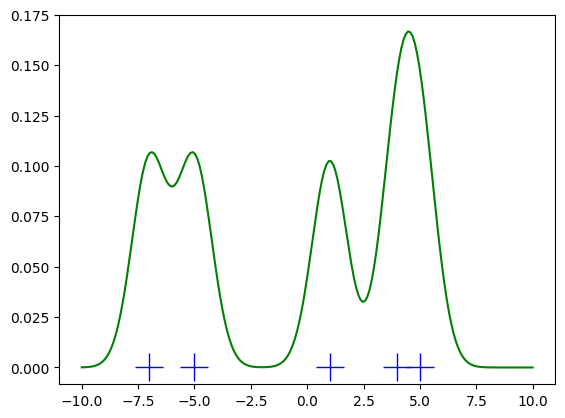

In [83]:
def my_kde_bandwidth(obj,fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor.""" 
    return np.power(obj.n,-1./(obj.d+4))*fac 

fig=plt.figure() 
ax=fig.add_subplot(111) 
ax.plot(x1,np.zeros(x1.shape),'b+',ms=20) #rugplot 

kde3=stats.gaussian_kde(x1,bw_method=my_kde_bandwidth) 
ax.plot(x_eval,kde3(x_eval),'g-',label="WithsmallerBW")


Text(0, 0.5, 'Density')

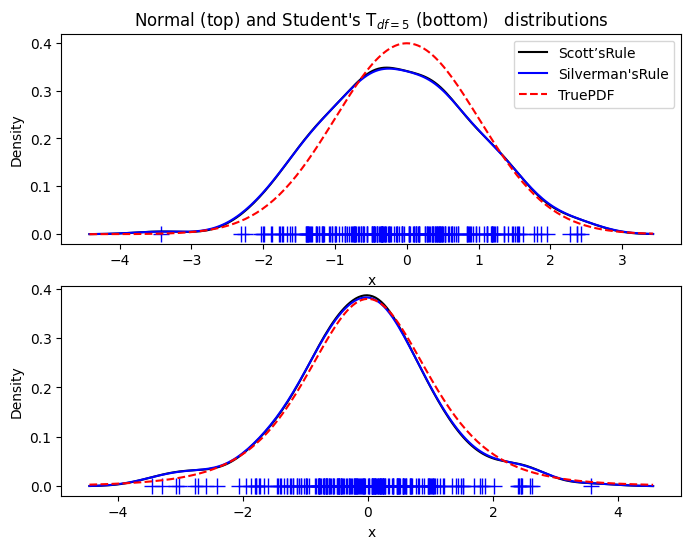

In [86]:
np.random.seed(12456) 

x1=np.random.normal(size=200) #randomdata, normaldistribution 
xs=np.linspace(x1.min()-1,x1.max()+1,200) 

kde1=stats.gaussian_kde(x1) 
kde2=stats.gaussian_kde(x1,bw_method='silverman') 

fig=plt.figure(figsize=(8,6))

ax1=fig.add_subplot(211) 
ax1.plot(x1,np.zeros(x1.shape),'b+',ms=12) #rugplot 
ax1.plot(xs,kde1(xs),'k-',label="Scott’sRule") 
ax1.plot(xs,kde2(xs),'b-',label="Silverman'sRule") 
ax1.plot(xs,stats.norm.pdf(xs),'r--',label="TruePDF") 

ax1.set_xlabel('x') 
ax1.set_ylabel('Density') 
ax1.set_title("Normal (top) and Student's T$_{df=5}$ (bottom)   distributions") 
ax1.legend(loc=1)

x2=stats.t.rvs(5,size=200) #random data,T distribution 
xs=np.linspace(x2.min()-1,x2.max()+1,200) 

kde3=stats.gaussian_kde(x2) 
kde4=stats.gaussian_kde(x2,bw_method='silverman') 

ax2=fig.add_subplot(212) 
ax2.plot(x2,np.zeros(x2.shape),'b+',ms=12) #rugplot 
ax2.plot(xs,kde3(xs),'k-',label="Scott'sRule") 
ax2.plot(xs,kde4(xs),'b-',label="Silverman'sRule") 
ax2.plot(xs,stats.t.pdf(xs,5),'r--',label="TruePDF") 

ax2.set_xlabel('x') 
ax2.set_ylabel('Density')

Text(0, 0.5, 'Density')

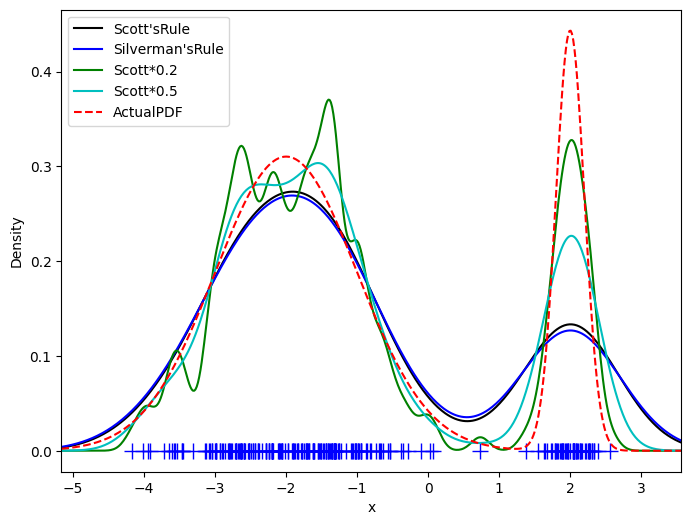

In [88]:
from functools import partial 

loc1,scale1,size1=(-2,1,175) 
loc2,scale2,size2=(2,0.2,50) 

x2=np.concatenate([np.random.normal(loc=loc1,scale=scale1,size=size1), 
                   np.random.normal(loc=loc2,scale=scale2,size=size2)]) 

x_eval=np.linspace(x2.min()-1,x2.max()+1,500) 

kde=stats.gaussian_kde(x2) 
kde2=stats.gaussian_kde(x2,bw_method='silverman') 
kde3=stats.gaussian_kde(x2,bw_method=partial(my_kde_bandwidth,fac=0.2)) 
kde4=stats.gaussian_kde(x2,bw_method=partial(my_kde_bandwidth,fac=0.5)) 

pdf=stats.norm.pdf 
bimodal_pdf=pdf(x_eval,loc=loc1,scale=scale1)*float(size1)/x2.size+pdf(x_eval,loc=loc2,scale=scale2)*float(size2)/x2.size 

fig=plt.figure(figsize=(8,6)) 
ax=fig.add_subplot(111)

ax.plot(x2,np.zeros(x2.shape),'b+',ms=12) 
ax.plot(x_eval,kde(x_eval),'k-',label="Scott'sRule") 
ax.plot(x_eval,kde2(x_eval),'b-',label="Silverman'sRule") 
ax.plot(x_eval,kde3(x_eval),'g-',label="Scott*0.2") 
ax.plot(x_eval,kde4(x_eval),'c-',label="Scott*0.5") 
ax.plot(x_eval,bimodal_pdf,'r--',label="ActualPDF") 

ax.set_xlim([x_eval.min(),x_eval.max()]) 
ax.legend(loc=2) 
ax.set_xlabel('x')
ax.set_ylabel('Density')

## Multivariate